In [2]:

%load_ext autoreload
%autoreload 2
# importing libraries
import matplotlib.pyplot as plt
import numpy as np
import math

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from run_generate_times  import read_spans , get_snp_dfs , find_span_mosaic, find_centers
from TimeFinder import TimeFinder

path = './result/from0_to47.txt'
path = None


In [6]:
from utils import read_full_spans
spans = read_full_spans(path)

Parsing file ./result/from47_to94.txt
Parsing file ./result/from282_to329.txt
Parsing file ./result/from0_to47.txt
Parsing file ./result/from141_to188.txt
Parsing file ./result/from846_to893.txt
Parsing file ./result/from564_to611.txt
Parsing file ./result/from423_to470.txt
Parsing file ./result/from94_to141.txt
Parsing file ./result/from752_to799.txt
Parsing file ./result/from235_to282.txt
Parsing file ./result/from799_to846.txt
Parsing file ./result/from188_to235.txt
Parsing file ./result/from470_to517.txt


In [ ]:
spans[1]  # Start, End, # Remove,# SNPs 

[48056228, 48056309, [], 2]

In [6]:
from SNPDataSet import get_snp_dfs
mutation_df = get_snp_dfs()
A= mutation_df['position'].unique()
A.sort()
muts = [p for p in A]


In [14]:
WINDOW_SIZE = [2, 3,4,10,20,30,40,50,60,70, 100, 150, 200, 250, 300, 350, 400, 500]
WINDOW_SIZE = [i for i in range(50,60)]
print(WINDOW_SIZE)
RR = {}

for w in WINDOW_SIZE:
    print(f"Checking for {w}")
    Result = {}
    uu = 0
    for m in muts:
        uu+=1
        if uu%500 == 0:
            print(f'{uu}/{len(muts)}')
        max_len = -1
        for s in spans:
            if m == s[0]:
                if s[3]> max_len:
                    max_len = s[3]
                if s[3] == w:
                    Result[m]= len(s[2])
                    break
        if not m in Result:
            # pass
            if uu+w<=len(muts):
                print(f"{m} Not found! {max_len}")
                Result[m] = 1000
            else:
                print('Im hee')
            # Result[m]= len(s[2])

            # break
            # Result[m] = max_len
    RR[w] = Result

[50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
Checking for 50
500/928
Im hee
48083635 Not found! 49
Im hee
48083649 Not found! 48
Im hee
48083693 Not found! 47
Im hee
48083786 Not found! 46
Im hee
48083792 Not found! 45
Im hee
48083797 Not found! 44
Im hee
48083798 Not found! 43
Im hee
48083803 Not found! 42
Im hee
48083805 Not found! 41
Im hee
48083838 Not found! 40
Im hee
48083851 Not found! 39
Im hee
48083860 Not found! 38
Im hee
48083911 Not found! 37
Im hee
48083921 Not found! 36
Im hee
48083932 Not found! 35
Im hee
48084062 Not found! 34
Im hee
48084114 Not found! 33
Im hee
48084149 Not found! 32
Im hee
48084177 Not found! 31
Im hee
48084282 Not found! 30
Im hee
48084304 Not found! 29
Im hee
48084329 Not found! 28
Im hee
48084339 Not found! 27
Im hee
48084340 Not found! 26
Im hee
48084363 Not found! 25
Im hee
48084413 Not found! 24
Im hee
48084435 Not found! 23
Im hee
48084445 Not found! 22
Im hee
48084446 Not found! 21
Im hee
48084498 Not found! 20
Im hee
48084510 Not found! 19
Im he

In [8]:

X= muts
Yz = {}
for w in WINDOW_SIZE:    
    Y = []
    for x in X:
        if x in RR[w]:
            Y.append(RR[w][x])
        else:
            Y.append(0)
    Yz[w] = Y

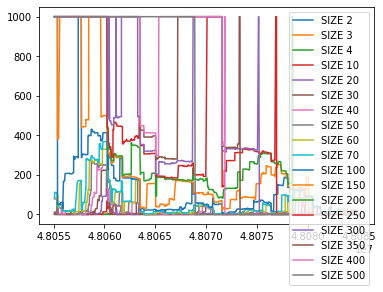

In [9]:

# importing package
import matplotlib.pyplot as plt
  
# plot lines
for w in WINDOW_SIZE:
    plt.plot(X, Yz[w], label=f'SIZE {w}')
plt.legend()
plt.show()

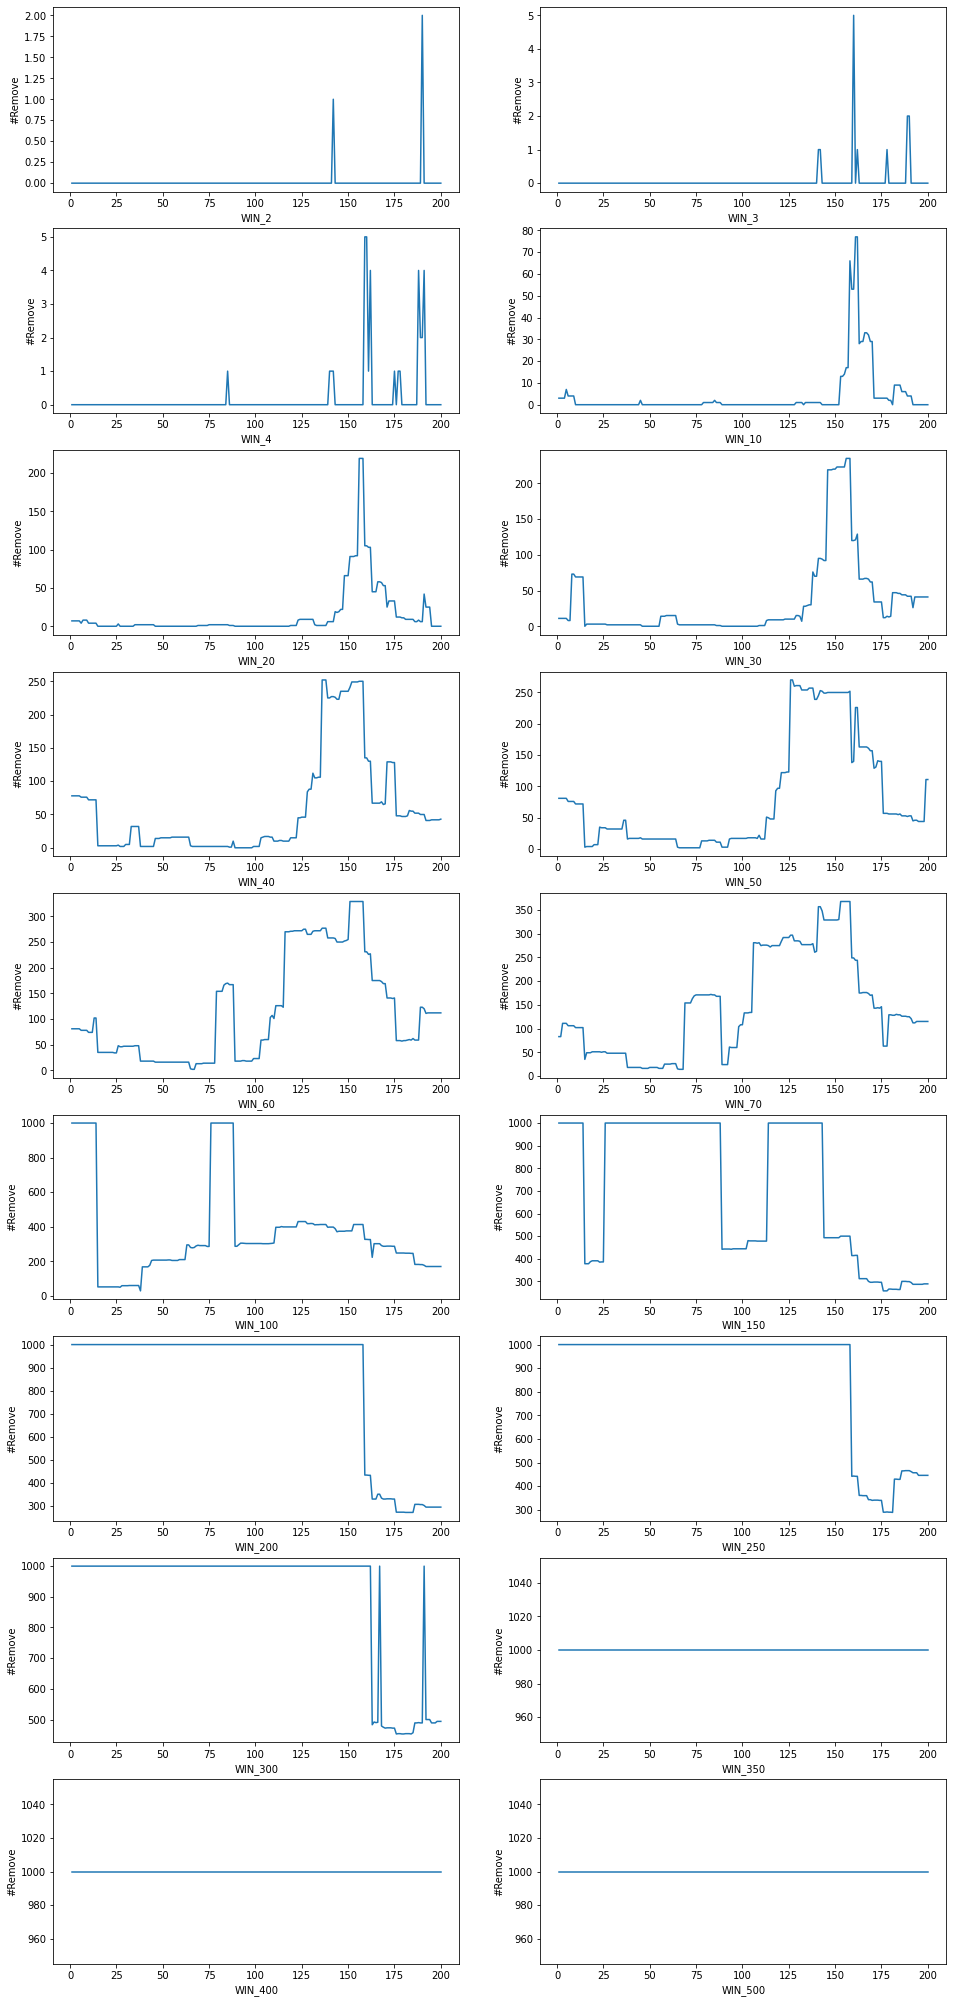

In [11]:
# Initialise the subplot function using number of rows and columns
COLS = 2
x_count = int(len(WINDOW_SIZE)/COLS)
y_count = COLS
figure, axis = plt.subplots(x_count,y_count)

figure.set_size_inches(16, 4*x_count)
# For Sine Function
X_ha = []
Y_ha = []
for i in range(len(WINDOW_SIZE)):
    Y_ha.append(Yz[WINDOW_SIZE[i]][:200])
    IDX = [i+1 for i in range(len(X))][:200]
    X_ha.append (IDX)
    
for i in range(len(WINDOW_SIZE)):
    x_index = int(i/COLS)
    y_index = int(i%COLS)
    axis[x_index,y_index].plot(X_ha[i], Y_ha[i], label=f'SIZE {WINDOW_SIZE[i]}')
# axis[0, 0].plot(X_ha[0], Y_ha[0])
# axis[0, 0].set_title("#5")
    plt.setp(axis[x_index, y_index], xlabel=f'WIN_{WINDOW_SIZE[i]}', ylabel="#Remove")

# plt.setp(axis[1], xlabel='Parameter', ylabel="#Mosaics")

# plt.xticks(fontsize=14)

# Combine all the operations and display
plt.show()

In [15]:
FIXED_LENGTH_WINDOWS = [2,5,10, 20, 50,100,200]

def find_haplo(start, end):
    candidates =  [s for s in spans if s[0]==start and s[1]==end]
    if len(candidates) == 0:
        # print(f'Not found any haplo in range {start} to {end}')
        return None
    return candidates[0]
res = {}
j= 0
for size in FIXED_LENGTH_WINDOWS:
    res[size]= []
    for m in muts:
        j+=1
        j%100 ==0 and print(f'{j} / {len(muts)}')
        for i in range(size):

            start = m- i
            end = start + size
            muts_in_range = [m for m in muts if m>=start and m<=end]
            if len(muts_in_range) ==0:
                print(f'No mutation found in range {start} to {end}. MUTATION_POSITION = {m}')
            firstSNPinRange = muts_in_range[0]
            lastSNPinRange = muts_in_range[-1]
            haplo = find_haplo(firstSNPinRange, lastSNPinRange)
            if haplo:
                res[size].append([start, len(haplo[2])])
        

100 / 928
200 / 928
300 / 928
400 / 928
500 / 928
600 / 928
700 / 928
800 / 928
900 / 928
1000 / 928
1100 / 928
1200 / 928
1300 / 928
1400 / 928
1500 / 928
1600 / 928
1700 / 928
1800 / 928
1900 / 928
2000 / 928
2100 / 928
2200 / 928
2300 / 928
2400 / 928
2500 / 928
2600 / 928
2700 / 928
2800 / 928
2900 / 928
3000 / 928
3100 / 928
3200 / 928
3300 / 928
3400 / 928
3500 / 928
3600 / 928
3700 / 928
3800 / 928
3900 / 928
4000 / 928
4100 / 928
4200 / 928
4300 / 928
4400 / 928
4500 / 928
4600 / 928
4700 / 928
4800 / 928


KeyboardInterrupt: 

In [27]:
res[2]

[[48055094, 0],
 [48055093, 0],
 [48055095, 0],
 [48055094, 0],
 [48055110, 0],
 [48055109, 0],
 [48055247, 0],
 [48055246, 0],
 [48055250, 0],
 [48055249, 0],
 [48055294, 0],
 [48055293, 0],
 [48055331, 0],
 [48055330, 0],
 [48055340, 0],
 [48055339, 0],
 [48055357, 0],
 [48055356, 0],
 [48055364, 0],
 [48055363, 0],
 [48055372, 0],
 [48055371, 0],
 [48055374, 0],
 [48055373, 0],
 [48055376, 0],
 [48055375, 0],
 [48055377, 0],
 [48055376, 0],
 [48055386, 0],
 [48055385, 0],
 [48055404, 0],
 [48055403, 0],
 [48055424, 0],
 [48055423, 0],
 [48055428, 0],
 [48055427, 0],
 [48055432, 0],
 [48055431, 0],
 [48055434, 0],
 [48055433, 0],
 [48055435, 0],
 [48055434, 0],
 [48055443, 0],
 [48055442, 0],
 [48055448, 0],
 [48055447, 0],
 [48055482, 0],
 [48055481, 0],
 [48055493, 0],
 [48055492, 0],
 [48055602, 0],
 [48055601, 0],
 [48055659, 0],
 [48055658, 0],
 [48055671, 0],
 [48055670, 0],
 [48055728, 0],
 [48055727, 0],
 [48055741, 0],
 [48055740, 0],
 [48055746, 0],
 [48055745, 0],
 [480557

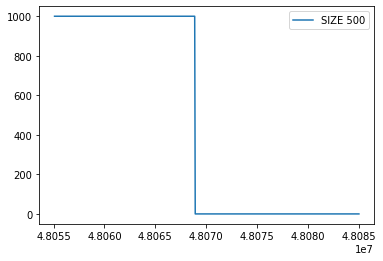

In [34]:
FIXED_LENGTH_WINDOWS = [2,5, 10, 20, 50, 100]

data = {}
for k in FIXED_LENGTH_WINDOWS:
    tempX = []
    tempY = []
    for r in res[k]:
        tempX.append(r[0])
        tempY.append(r[1])
    data[k] = [tempX, tempY]

# importing package
import matplotlib.pyplot as plt
  
# plot lines
plt.plot(X, Y, label=f'SIZE {w}')
plt.legend()
plt.show()

In [35]:
data

{2: [[48055094,
   48055093,
   48055095,
   48055094,
   48055110,
   48055109,
   48055247,
   48055246,
   48055250,
   48055249,
   48055294,
   48055293,
   48055331,
   48055330,
   48055340,
   48055339,
   48055357,
   48055356,
   48055364,
   48055363,
   48055372,
   48055371,
   48055374,
   48055373,
   48055376,
   48055375,
   48055377,
   48055376,
   48055386,
   48055385,
   48055404,
   48055403,
   48055424,
   48055423,
   48055428,
   48055427,
   48055432,
   48055431,
   48055434,
   48055433,
   48055435,
   48055434,
   48055443,
   48055442,
   48055448,
   48055447,
   48055482,
   48055481,
   48055493,
   48055492,
   48055602,
   48055601,
   48055659,
   48055658,
   48055671,
   48055670,
   48055728,
   48055727,
   48055741,
   48055740,
   48055746,
   48055745,
   48055748,
   48055747,
   48055751,
   48055750,
   48055779,
   48055778,
   48055785,
   48055784,
   48055821,
   48055820,
   48055894,
   48055893,
   48055898,
   48055897,
   480559

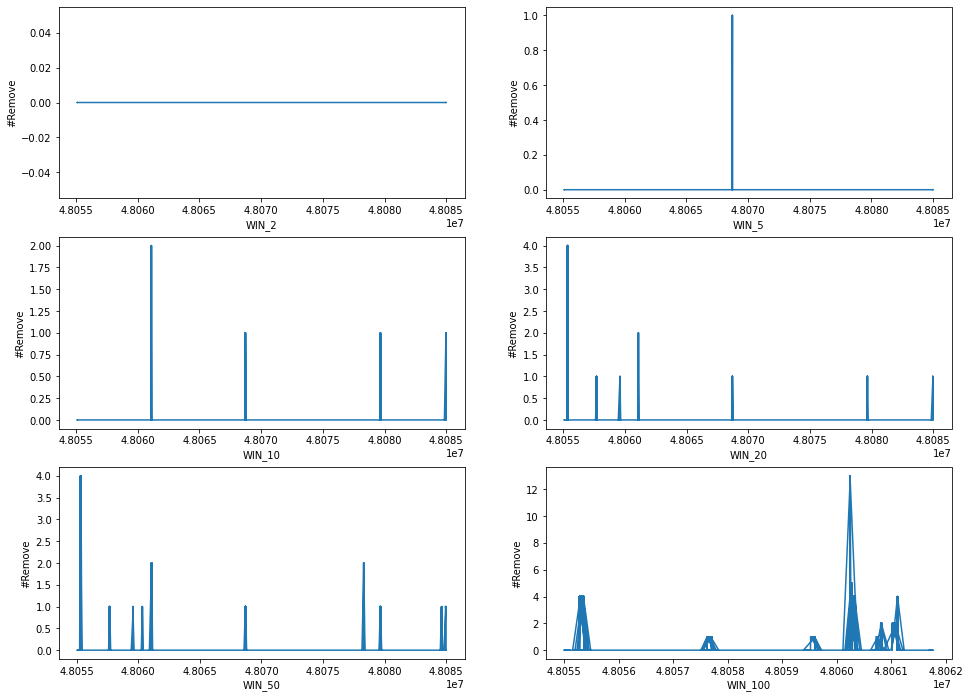

In [36]:
# Initialise the subplot function using number of rows and columns
COLS = 2
x_count = int(len(FIXED_LENGTH_WINDOWS)/COLS)
y_count = COLS
figure, axis = plt.subplots(x_count,y_count)

figure.set_size_inches(16, 4*x_count)
# For Sine Function
X_ha = []
Y_ha = []
for i in range(len(FIXED_LENGTH_WINDOWS)):
    X_ha.append(data[FIXED_LENGTH_WINDOWS[i]][0])
    Y_ha.append(data[FIXED_LENGTH_WINDOWS[i]][1])

for i in range(len(FIXED_LENGTH_WINDOWS)):
    x_index = int(i/COLS)
    y_index = int(i%COLS)
    axis[x_index,y_index].plot(X_ha[i], Y_ha[i], label=f'SIZE {FIXED_LENGTH_WINDOWS[i]}')
# axis[0, 0].plot(X_ha[0], Y_ha[0])
# axis[0, 0].set_title("#5")
    plt.setp(axis[x_index, y_index], xlabel=f'WIN_{FIXED_LENGTH_WINDOWS[i]}', ylabel="#Remove")

# plt.setp(axis[1], xlabel='Parameter', ylabel="#Mosaics")

# plt.xticks(fontsize=14)

# Combine all the operations and display
plt.show()

In [21]:
from scipy.stats import differential_entropy, norm

In [117]:
muts

[48055094,
 48055095,
 48055110,
 48055247,
 48055250,
 48055294,
 48055331,
 48055340,
 48055357,
 48055364,
 48055372,
 48055374,
 48055376,
 48055377,
 48055386,
 48055404,
 48055424,
 48055428,
 48055432,
 48055434,
 48055435,
 48055443,
 48055448,
 48055482,
 48055493,
 48055602,
 48055659,
 48055671,
 48055728,
 48055741,
 48055746,
 48055748,
 48055751,
 48055779,
 48055785,
 48055821,
 48055894,
 48055898,
 48055971,
 48056038,
 48056059,
 48056083,
 48056092,
 48056128,
 48056154,
 48056160,
 48056167,
 48056228,
 48056309,
 48056376,
 48056398,
 48056409,
 48056504,
 48056578,
 48056597,
 48056736,
 48056791,
 48056817,
 48056875,
 48056922,
 48056955,
 48056967,
 48056968,
 48056981,
 48057031,
 48057086,
 48057101,
 48057106,
 48057309,
 48057310,
 48057315,
 48057324,
 48057341,
 48057400,
 48057419,
 48057421,
 48057464,
 48057480,
 48057546,
 48057570,
 48057604,
 48057620,
 48057628,
 48057643,
 48057701,
 48057703,
 48057708,
 48057719,
 48057735,
 48057766,
 48057783,

In [118]:
mutation_df

,position,sample,state
0,48055094,HG03055_0,1
1,48055094,HG03485_1,1
2,48055095,NA20505_1,1
3,48055110,HG02256_1,1
4,48055247,HG01305_0,1
...,...,...,...
123472,48084989,NA21137_0,1
123473,48084989,NA21141_0,1
123474,48084989,NA21141_1,1
123475,48084989,NA21142_0,1


In [120]:
from SNPDataSet import get_snp_dfs
from utils import convert_mutation_df_to_vcf
from SpanFinderNew import SpanFinder


MAX_THRESHOLD = 30
def find_for_items(start, end):

    XX = sf.find_all_spans(MAX_THRESHOLD, start, end)

    with open(f'./result/from{start}_to{end}.txt', 'w') as f:
        for item in XX:
            f.write("%s\n" % item)
GGG = find_for_items(48055094, 48055247)

0, 123477
10000, 123477
20000, 123477
30000, 123477
40000, 123477
50000, 123477
60000, 123477
70000, 123477
80000, 123477
90000, 123477
100000, 123477
110000, 123477
120000, 123477


In [148]:

mutsz = get_snp_dfs()
vcf = convert_mutation_df_to_vcf(mutsz)

sf = SpanFinder(vcf, False)


0, 123477
10000, 123477
20000, 123477
30000, 123477
40000, 123477
50000, 123477
60000, 123477
70000, 123477
80000, 123477
90000, 123477
100000, 123477
110000, 123477
120000, 123477


([], {'00': 5005, '01': 2, '10': 1, '11': 0}, '11')

In [195]:
temp_data = Yz[WINDOW_SIZE[2]]
for x in range(len(temp_data)):
    if temp_data[x]==8:
        print(x)
        break


782


In [196]:
X[782], 

48080388

In [155]:
48080376, 48080388, 48080393

(48080376, 48080388, 48080393)

In [205]:
sf.find_combinations( X[782], X[784], [])

(['HG00240_1',
  'HG00320_0',
  'HG01619_0',
  'HG02648_1',
  'NA07051_0',
  'NA12234_0',
  'NA20527_1',
  'NA20538_1'],
 {'00': 4810, '01': 47, '10': 8, '11': 143},
 '10')

In [201]:
sf.find_spans( X[782], 10)

[[48080393, []],
 [48080477,
  ['HG02648_1',
   'HG00320_0',
   'HG00240_1',
   'NA07051_0',
   'HG01619_0',
   'NA12234_0',
   'NA20527_1',
   'NA20538_1']],
 [48080492,
  ['HG02648_1',
   'HG00320_0',
   'HG00240_1',
   'NA07051_0',
   'HG01619_0',
   'NA12234_0',
   'NA20527_1',
   'NA20538_1']],
 [48080493,
  ['HG02648_1',
   'HG00320_0',
   'HG00240_1',
   'NA07051_0',
   'HG01619_0',
   'NA12234_0',
   'NA20527_1',
   'NA20538_1']],
 [48080504,
  ['HG02648_1',
   'HG00320_0',
   'HG00240_1',
   'NA07051_0',
   'HG01619_0',
   'NA12234_0',
   'NA20527_1',
   'NA20538_1']],
 [48080513,
  ['HG02648_1',
   'HG00320_0',
   'HG00240_1',
   'NA07051_0',
   'HG01619_0',
   'NA12234_0',
   'NA20527_1',
   'NA20538_1']],
 [48080594,
  ['HG02648_1',
   'HG00320_0',
   'HG00240_1',
   'NA07051_0',
   'HG01619_0',
   'NA12234_0',
   'NA20527_1',
   'NA20538_1']],
 [48080704,
  ['HG02648_1',
   'HG00320_0',
   'HG00240_1',
   'NA07051_0',
   'HG01619_0',
   'NA12234_0',
   'NA20527_1',
   'NA2

In [192]:
for i in range(len(muts)):
    if muts[i] == 48084989:
        print(i)
        break

927


In [176]:
muts[50]

48056398

In [178]:
48058045

48058045

In [244]:
KK = sf.find_spans(48055094, 10)

In [245]:
len(KK)

38

In [248]:

LL = sf.find_spans(48055971, 10)

In [243]:
len(JJ)

57

In [249]:
len(LL)

70

In [251]:
MM = sf.find_spans(LL[-1][0], 10)

In [252]:
len(MM)

54

In [253]:
MM[-1]

[48060377,
 ['HG02976_0',
  'HG03687_0',
  'NA18876_0',
  'HG01102_0',
  'HG03433_0',
  'HG03953_1',
  'HG02628_1',
  'HG01521_0',
  'HG02315_0',
  'HG03235_0',
  'HG03247_1',
  'HG01977_0',
  'NA18489_1',
  'HG02442_0',
  'HG01746_0',
  'HG03646_1',
  'NA19153_1',
  'HG03779_1',
  'HG03388_1',
  'HG03397_1',
  'HG01773_0',
  'HG03103_0',
  'HG02938_1',
  'NA20850_1',
  'HG01362_1',
  'NA21127_1',
  'HG00638_1',
  'NA21137_0',
  'NA19108_0',
  'HG04099_0',
  'HG00240_1',
  'HG03279_1',
  'HG00623_1',
  'HG03595_1',
  'HG01989_0',
  'HG03934_1',
  'NA18878_1',
  'HG03744_1',
  'HG00244_0',
  'NA20859_0',
  'HG03557_1',
  'HG03163_0',
  'HG03897_1',
  'NA20517_1',
  'HG02981_0',
  'HG02537_0',
  'NA12273_1',
  'HG00108_0',
  'HG03240_1',
  'NA19917_1',
  'HG03755_0',
  'HG03868_0',
  'HG01311_1',
  'HG01440_1',
  'HG03571_1',
  'HG03830_1',
  'NA20127_0']]

In [265]:
NN  = sf.find_spans(MM[-1][0], 10)

5008
 position 48060385, remove 0
 position 48060393, remove 0
 position 48060420, remove 0
 position 48060449, remove 0
 position 48060510, remove 0
 position 48060512, remove 0
 position 48060514, remove 28
 position 48060543, remove 28
 position 48060544, remove 28
 position 48060555, remove 29
 position 48060567, remove 29
 position 48060617, remove 42
 position 48060690, remove 42
 position 48060717, remove 42
 position 48060752, remove 43
 position 48060801, remove 43
 position 48060825, remove 45
 position 48060826, remove 45
 position 48060838, remove 45
 position 48060872, remove 45
total remove = 534, max threshold arrived in position 48060872


In [258]:
len(NN)

19

In [260]:
len(NN[-1][1])

45

In [262]:
5008*10/100

500.8

In [267]:
len(muts)

928

In [268]:
48055079 - 48085036 

-29957